<a href="https://colab.research.google.com/github/ms624atyale/PictureBook_Archive_inProgress/blob/main/Prototype_SentmentAnalysis_IncludingConvertingTxt2CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1Ô∏è‚É£ <font color = 'red'> üêπüêæ **Clone a github repository of your interest**

In [14]:
! git clone https://github.com/ms624atyale/PictureBook_Archive_inProgress   #Make copy of the whole repository of a github account.

Cloning into 'PictureBook_Archive_inProgress'...
remote: Enumerating objects: 190, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 190 (delta 54), reused 50 (delta 50), pack-reused 134 (from 1)
Receiving objects: 100% (190/190), 1.71 MiB | 7.43 MiB/s, done.
Resolving deltas: 100% (111/111), done.


## ‚§µÔ∏è <font color = 'blue'> **‚ñ∂Ô∏è Python code** when deleting the old directory forcefully

### <font color = 'gray'> **! rm -rf NameofOldRepository**    

#2Ô∏è‚É£ üêπüêæ **Set up the current directory**
### üÜò <font color = 'red'> Generally it should include the file level of your repository

In [15]:
%cd /content/PictureBook_Archive_inProgress/Input_Data

/content/PictureBook_Archive_inProgress/Input_Data


In [16]:
import pandas as pd # Pandas comes pre-installed in Colab.

#%cd is a magic command used in Colab to change the current working directory.
#This line navigates to the directory (e.g., folder), where seven text files are stored.

import glob              # glob module, which is used to find files and directories matching a specified pattern.
fns = glob.glob('*.txt') # glob.glob('*.txt') retrieves a list of all .txt files in the current working directory.
df = pd.DataFrame()      # Initializes an empty DataFrame called df using Pandas, which will be used to store data from all the .txt files combined.

for fn in fns:                     # loops through the list of .txt files (fns) retrieved earlier.
  dftmp = pd.read_csv(fn, sep="@") # read_csv read comma separated files or other delimited text files with @. Variable name _fn_ is each .txt file under the 'Book Text' folder.
                                   # indicates Pandas to treat the @ symbol as the delimiter separating columns within the file.
  df = pd.concat([df, dftmp])      # combines all data from dftmp DataFrame with the empty df DataFrame.
%cd /content                       # Back to the base directory of Colab

df
# compare with print(df)

[Errno 2] No such file or directory: '/content # Back to the base directory of Colab'
/content/PictureBook_Archive_inProgress/Input_Data


text  \
0  there was once a sweet little maid who lived w...   
1  one morning a little rabbit sat on a bank.  he...   
2  a carrion crow sat on an oak,   fol de riddle,...   
3  a carrion crow sat on an oak,   fol de riddle,...   
4  a  a carrion crow sat on an oak, watching a ta...   
5  household stories by brothers grimm   the rabb...   
6  the following lines by mr. lear were written f...   
7  [illustration: several of the children were gr...   

                         author  
0                   watty piper  
1                beatrix potter  
2                 leslie brooke  
3                leslie brooke   
4                 walter crane   
5  jacob grimm and wihelm grimm  
6                  edward lear   
7               charles dickens

In [18]:
# Save the DataFrame as a CSV file (This csv file is generated under the folder you are currently working on!)
df.to_csv("PG_ChildrenPictureBooks_7Authors.csv", index=False)  # Saves without the index column

In [19]:
file=open('/content/PictureBook_Archive_inProgress/Input_Data/PG_ChildrenPictureBooks_7Authors.csv')

txt = file.read()
print(txt)
file.close()

text,author
"there was once a sweet little maid who lived with her father and mother in a pretty little cottage at the edge of the village. at the further end of the wood was another pretty cottage and in it lived her grandmother.  everybody loved this little girl, her grandmother perhaps loved her most of all and gave her a great many pretty things. once she gave her a red cloak with a hood which she always wore, so people called her little red riding hood.  one morning little red riding hood's mother said, put on your things and go to see your grandmother. she has been ill; take along this basket for her. i have put in it eggs, butter and cake, and other dainties.  it was a bright and sunny morning. red riding hood was so happy that at first she wanted to dance through the wood. all around her grew pretty wild flowers which she loved so well and she stopped to pick a bunch for her grandmother.  little red riding hood wandered from her path and was stooping to pick a flower when from 

### üê∂ **Download the nltk library and punkt-related modules.**


In [20]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### üê∂ **Sentence Tokenization**

In [21]:
from nltk.tokenize import sent_tokenize
sentence = sent_tokenize(txt)
print('Î¨∏Ïû• ÌÜ†ÌÅ∞Ìôî: %s' %sentence)

Î¨∏Ïû• ÌÜ†ÌÅ∞Ìôî: ['text,author\n"there was once a sweet little maid who lived with her father and mother in a pretty little cottage at the edge of the village.', 'at the further end of the wood was another pretty cottage and in it lived her grandmother.', 'everybody loved this little girl, her grandmother perhaps loved her most of all and gave her a great many pretty things.', 'once she gave her a red cloak with a hood which she always wore, so people called her little red riding hood.', "one morning little red riding hood's mother said, put on your things and go to see your grandmother.", 'she has been ill; take along this basket for her.', 'i have put in it eggs, butter and cake, and other dainties.', 'it was a bright and sunny morning.', 'red riding hood was so happy that at first she wanted to dance through the wood.', 'all around her grew pretty wild flowers which she loved so well and she stopped to pick a bunch for her grandmother.', 'little red riding hood wandered from her pa

### üê∂ **Word Tokenization**

In [22]:
from nltk.tokenize import RegexpTokenizer

# Define the path to your input text file
input_file_path = '/content/PictureBook_Archive_inProgress/Input_Data/PG_ChildrenPictureBooks_7Authors.csv'

# Create a regular expression tokenizer
retokenize = RegexpTokenizer(r'\w+')

# Read the content of the input text file
with open(input_file_path, 'r') as file:
    obj = file.read()

# Tokenize the input text
tokens = retokenize.tokenize(obj)

# Define the path for the output text file
output_file_path = 'tokenized_text.txt'

# Save the tokens to the output file
with open(output_file_path, 'w') as outfile:
    outfile.write('\n'.join(tokens))

print(f"Tokenized text saved to {output_file_path}") #This txt file is generated under the current working directory.

Tokenized text saved to tokenized_text.txt


In [25]:
#üêπ üêæ   Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨: PandasÏù¥Ïö© Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨ (Ï±ÖÏùò Ìïú Ï±ïÌÑ∞Í∞Ä Ìïú ÏÖÄÏóê ÏûàÎäî ÏÉÅÌÉú)
import pandas as pd #Importing Pandas package
%cd /content/PictureBook_Archive_inProgress/Input_Data

import glob
fns = glob.glob('*.txt')
df = pd.DataFrame()
for fn in fns:
  dftmp = pd.read_csv(fn, sep="@")
  df = pd.concat([df, dftmp])

%cd /content

df

/content/PictureBook_Archive_inProgress/Input_Data
/content


text          author
0       there was once a sweet little maid who lived w...     watty piper
1       one morning a little rabbit sat on a bank.  he...  beatrix potter
2       a carrion crow sat on an oak,   fol de riddle,...   leslie brooke
3       a carrion crow sat on an oak,   fol de riddle,...  leslie brooke 
4       a  a carrion crow sat on an oak, watching a ta...   walter crane 
...                                                   ...             ...
159580                                            expired             NaN
159581                                                 in             NaN
159582                                        convulsions             NaN
159583                                            charles             NaN
159584                                            dickens             NaN

[159593 rows x 2 columns]

In [26]:
#Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∂àÏö©Ïñ¥(stopwords) Ï†úÍ±∞
import nltk #Import NLTK library
nltk.download('stopwords')
nltk.download('punkt') #installed punkt to fix error

from nltk import word_tokenize
from nltk.corpus import stopwords #Import stopwords to Python

stopwords = set(stopwords.words('english')) #English stopwords assigned to "stopwords" object

import string #Punctuation

# Function for removing punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

stopwords = [''.join(item for item in x if item not in string.punctuation) for x in stopwords] #Remove punctuation from stopwords

df['WordCountText']=df['text'].str.lower().apply(remove_punctuations).apply(word_tokenize) # Word Count text column ('text' as the column header)

# Word Count
df['WordCloudText']=df['WordCountText'].apply(lambda x: [word for word in x if word not in stopwords]) # Word Cloud Text

df['WordCount'] = df['WordCountText'].str.len() #Word Count Per Chapter


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
#ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨(VADER library) Î∂àÎü¨Ïò§Í∏∞
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sid=nltk.sentiment.vader.SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [29]:
#successfully working code lines. Use this and ignore the othere.
import pandas as pd
import nltk
nltk.download('punkt')
from nltk import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Read your CSV file with a single 'text' column
df = pd.read_csv('/content/PictureBook_Archive_inProgress/Input_Data/PG_ChildrenPictureBooks_7Authors.csv')  # Replace 'your_csv_file.csv' with the actual file path

# Tokenize the text by sentences and create a new DataFrame
dfsentiment = df['text'].apply(sent_tokenize).explode().reset_index(drop=True)

# Clean punctuation and convert to lowercase
dfsentiment = dfsentiment.apply(remove_punctuations).str.lower()

# Initialize the VADER SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Custom function to calculate the compound score for each sentence
def calculate_compound_score(sentence):
    sentiment_scores = sid.polarity_scores(sentence)
    return sentiment_scores['compound']

# Calculate the compound score for each sentence
dfsentiment['CompScore'] = dfsentiment.apply(calculate_compound_score)

# Adding Sentiment Flags
dfsentiment['PosFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if x >= 0.05 else 0)
dfsentiment['NegFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if x <= -0.05 else 0)
dfsentiment['NeuFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if -0.05 < x < 0.05 else 0)

# Display the modified DataFrame
print(dfsentiment.head())

dfsentiment.head(20)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    there was once a sweet little maid who lived w...
1    at the further end of the wood was another pre...
2    everybody loved this little girl her grandmoth...
3    once she gave her a red cloak with a hood whic...
4    one morning little red riding hoods mother sai...
Name: text, dtype: object


0     there was once a sweet little maid who lived w...
1     at the further end of the wood was another pre...
2     everybody loved this little girl her grandmoth...
3     once she gave her a red cloak with a hood whic...
4     one morning little red riding hoods mother sai...
5       she has been ill take along this basket for her
6     i have put in it eggs butter and cake and othe...
7                     it was a bright and sunny morning
8     red riding hood was so happy that at first she...
9     all around her grew pretty wild flowers which ...
10    little red riding hood wandered from her path ...
11    little red riding hood turned around and saw a...
12    what have you in that basket little red riding...
13                     eggs and butter and cake mr wolf
14    where are you going with them little red ridin...
15      i am going to my grandmother who is ill mr wolf
16    where does your grandmother live little red ri...
17    along that path past the wild rose bushes then...
18    then mr wolf again said good morning and set o...
19    at last he reached the porch covered with flow...
Name: text, dtype: object

* Negative Flag:  1917
* Neutral Flag:  3014
* Positive Flag:  2668
Total:  7599


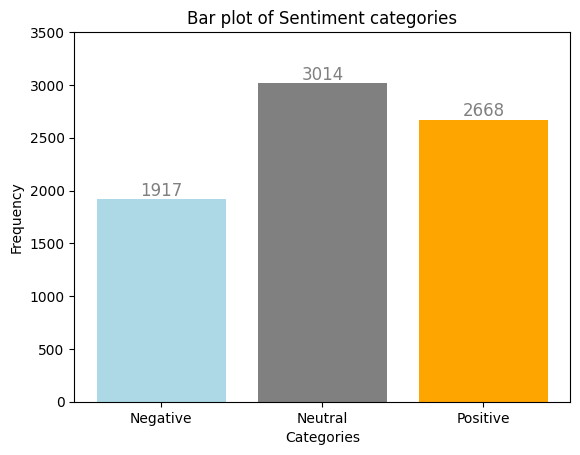

In [31]:
#[1] Í∞êÏ†ïÎ∂ÑÏÑù Í≤∞Í≥º ÎßâÎåÄÍ∑∏ÎûòÌîÑ (Î∂ÄÏ†ï, Ï§ëÎ¶Ω, Í∏çÏ†ï)

print('* Negative Flag: ', dfsentiment['NegFlag'].sum())
print('* Neutral Flag: ', dfsentiment['NeuFlag'].sum())
print('* Positive Flag: ', dfsentiment['PosFlag'].sum())
print("="*50)
print('Total: ',dfsentiment['PosFlag'].sum()+dfsentiment['NeuFlag'].sum()+dfsentiment['NegFlag'].sum())


import numpy as np
import matplotlib.pyplot as plt

Negative = int(dfsentiment['NegFlag'].sum())
Neutral = int(dfsentiment['NeuFlag'].sum())
Positive = int(dfsentiment['PosFlag'].sum())

# Your three integer frequencies
freqs = [Negative, Neutral, Positive]
# freqs = [18385, 33544, 19055]

# Create labels for the bars
labels = ['Negative', 'Neutral', 'Positive']

# Create x coordinates for the bars
x = np.arange(len(labels))

# Generate the bar plot
plt.bar(x, freqs)


# Specify the colors for each category
colors = ['lightblue', 'gray', 'orange']

# Generate the bar plot with custom colors

bars = plt.bar(x, freqs, color=colors)
# Add labels to the x-axis
plt.xticks(x, labels)

# Set axis labels
plt.xlabel('Categories')
plt.ylabel('Frequency')

# Set a title for the plot
plt.title('Bar plot of Sentiment categories')
plt.ylim(0, 3500)
# Add the frequency text within each bar
for bar, freq in zip(bars, freqs):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 2, str(freq),
             ha='center', va='bottom', fontsize=12, color='gray')


# Display the plot
plt.show()

In [32]:
# Í∞êÏ†ïÎ∂ÑÏÑù Ïπ¥ÌÖåÍ≥†Î¶¨ ÌååÏù¥Ï∞®Ìä∏ (ÎπÑÏú®ÌôïÏù∏Ïö©)
import numpy as np
import matplotlib.pyplot as plt

Negative = int(dfsentiment['NegFlag'].sum())
Neutral = int(dfsentiment['NeuFlag'].sum())
Positive = int(dfsentiment['PosFlag'].sum())

# Your three integer frequencies
freqs = [Negative, Neutral, Positive]

# Create labels for the segments
labels = ['Negative', 'Neutral', 'Positive']

# Specify the colors for each segment
colors = ['lightblue', 'gray', 'orange']

# Generate the pie chart with custom colors
plt.pie(freqs, labels=labels, colors=colors, autopct='%.1f%%', startangle=90)

# Set a title for the plot
plt.title('Pie chart of Sentiment categories')

# Display the plot
plt.show()
